In [1]:
import xarray as xr
from matplotlib import pyplot as plt
import numpy as np
import math
from xhistogram.xarray import histogram
%load_ext autoreload
%autoreload 2
import pei.myfunctions as mf

In [ ]:
# Specify root directory, experiment, filename format
rootdir = '/local/ss23/CESM2_LE/ATM/RCP85/WBT'
filename_2085 = '/b.e21.BSSP370cmip6.f09_g17.LE2-1231.*.clm2.h7.WBT.2085010100-2095010100.nc' 
paths_2085 = rootdir+filename_2085

# Load data from matching files
ds_2085 = xr.open_mfdataset(paths_2085,combine='nested',concat_dim='ensemble')
ds_2085_max = ds_2085['WBT'].resample(time='1D').max()
ds_2085_max.to_netcdf('../data/processed/wbt.2085-2095.max')

In [ ]:
ds_2085_mean = ds_2085['WBT'].resample(time='1D').mean()
ds_2085_mean.to_netcdf('../data/processed/wbt.2085-2095.mean')

In [ ]:
ds_2085_min = ds_2085['WBT'].resample(time='1D').min()
ds_2085_min.to_netcdf('../data/processed/wbt.2085-2095.min')

In [ ]:
filename_1980 = '/b.e21.BHISTcmip6.f09_g17.LE2-1231.*.clm2.h7.WBT.1980010100-1990010100.nc' 
paths_1980 = rootdir+filename_1980

# Load data from matching files
ds_1980 = xr.open_mfdataset(paths_1980,combine='nested',concat_dim='ensemble')
ds_1980_max = ds_1980['WBT'].resample(time='1D').max()
ds_1980_max.to_netcdf('../data/processed/wbt.1980-1990.max')

In [ ]:
ds_1980_mean = ds_1980['WBT'].resample(time='1D').mean()
ds_1980_mean.to_netcdf('../data/processed/wbt.1980-1990.mean')

In [ ]:
ds_1980_min = ds_1980['WBT'].resample(time='1D').min()
ds_1980_min.to_netcdf('../data/processed/wbt.1980-1990.min')

In [10]:
land_area = ds_2085['area']*ds_2085['landfrac']
land_area.to_netcdf('../data/processed/wbt.land_area')

## Load Data for All Ensembles

In [2]:
# Load max data
ds_2085_max = xr.open_dataset('../data/processed/wbt.2085-2095.max')
ds_1980_max = xr.open_dataset('../data/processed/wbt.1980-1990.max')

# Load mean data
ds_2085_mean = xr.open_dataset('../data/processed/wbt.2085-2095.mean')
ds_1980_mean = xr.open_dataset('../data/processed/wbt.1980-1990.mean')

# Load min data
ds_2085_min = xr.open_dataset('../data/processed/wbt.2085-2095.min')
ds_1980_min = xr.open_dataset('../data/processed/wbt.1980-1990.min')

# Load area data
land_area = xr.open_dataset('../data/processed/wbt.land_area')
land_mask = ~np.isnan(land_area)
land_area_adj = land_area.where(land_mask,0)
land_area_adj['land_area'] = land_area_adj['__xarray_dataarray_variable__']
land_area_adj = land_area_adj.drop(['__xarray_dataarray_variable__'])

## Regional Masks

In [25]:
lon = land_area_adj['lon']
lat = land_area_adj['lat']

# Dictionary of region masks, represented by lon and lat arrays
masks = {}
masks['Global'] = [lon, lat]
masks['Northern North America'] = [lon.where((190<=lon)&(lon<=310),drop=True).values,lat.where((45<=lat)&(lat<=75),drop=True).values]
masks['Central North America'] = [lon.where((230<=lon)&(lon<=310),drop=True).values,lat.where((35<=lat)&(lat<=45),drop=True).values]
masks['South-Central America'] = [lon.where((230<=lon)&(lon<=330),drop=True).values,lat.where((-30<=lat)&(lat<=35),drop=True).values]
masks['Southern South America'] = [lon.where((270<=lon)&(lon<=330),drop=True).values,lat.where((-60<=lat)&(lat<=-30),drop=True).values]
masks['Central America'] = [lon.where((250<=lon)&(lon<=315),drop=True).values,lat.where((7<=lat)&(lat<=20),drop=True).values]
masks['Northern South America'] = [lon.where((270<=lon)&(lon<=330),drop=True).values,lat.where((-23.5<=lat)&(lat<=10),drop=True).values]
masks['China'] = [lon.where((75<=lon)&(lon<=135),drop=True).values,lat.where((22.5<=lat)&(lat<=50),drop=True).values]
masks['Southern China'] = [lon.where((98<=lon)&(lon<=125),drop=True).values,lat.where((22<=lat)&(lat<=32),drop=True).values]
masks['India'] = [lon.where((68<=lon)&(lon<=90),drop=True).values,lat.where((8<=lat)&(lat<=30),drop=True).values]
masks['Oceania'] = [lon.where((100<=lon)&(lon<=180),drop=True).values,lat.where((-50<=lat)&(lat<=0),drop=True).values]
masks['Northern Oceania'] = [lon.where((100<=lon)&(lon<=180),drop=True).values,lat.where((-23.5<=lat)&(lat<=0),drop=True).values]
masks['Southern Oceania'] = [lon.where((100<=lon)&(lon<=180),drop=True).values,lat.where((-50<=lat)&(lat<=-23.5),drop=True).values]
masks['Russia'] = [lon.where((30<=lon)&(lon<=180),drop=True).values,lat.where((50<=lat)&(lat<=75),drop=True).values]
masks['Scandinavia'] = [lon.where((3<=lon)&(lon<=30),drop=True).values,lat.where((55<=lat)&(lat<=70),drop=True).values]
lon_west = lon.where(lon>=345,drop=True)
lon_east = lon.where(lon<=30,drop=True)
lon_eur = xr.concat((lon_west,lon_east),dim='lon').values
masks['Europe'] = [lon_eur,lat.where((35<=lat)&(lat<=55),drop=True)]
lon_west = lon.where(lon>=350,drop=True)
lon_east = lon.where(lon<=24,drop=True)
lon_seur = xr.concat((lon_west,lon_east),dim='lon').values
masks['Southern Europe'] = [lon_seur,lat.where((36<=lat)&(lat<=44),drop=True)]
lon_west = lon.where(lon>=355,drop=True)
lon_east = lon.where(lon<=10,drop=True)
lon_france = xr.concat((lon_west,lon_east),dim='lon').values
masks['France'] = [lon_france,lat.where((40<=lat)&(lat<=52),drop=True)]
masks['Middle East'] = [lon.where((25<=lon)&(lon<=60),drop=True).values,lat.where((10<=lat)&(lat<=40),drop=True).values]
masks['Southeast Asia'] = [lon.where((92<=lon)&(lon<=140),drop=True).values,lat.where((-10<=lat)&(lat<=25),drop=True).values]
lon_west = lon.where(lon>=340,drop=True)
lon_east = lon.where(lon<=55,drop=True)
lon_safrica = xr.concat((lon_west,lon_east),dim='lon').values
masks['Southern Africa'] = [lon_safrica,lat.where((-40<=lat)&(lat<=10),drop=True).values]
masks['Central Africa'] = [lon_safrica,lat.where((-10<=lat)&(lat<=10),drop=True).values]

## Function to Isolate Data for a Region

In [4]:
def slice_region(ds, region):
    ds_region = ds.sel(lon=masks[region][0],lat=masks[region][1])
    return ds_region

## Plot Histogram Function: Daily Max

In [5]:
def hist(ds, area, region, ax):
    bins = np.linspace(-20,40,60)

    ds_region = slice_region(ds,region)['WBT']
    
    area_region = slice_region(area,region)
    area_weights = area_region/(area_region.sum(['lon','lat']))
    
    total_hist = histogram(ds_region,bins=[bins],weights=area_weights['land_area'],density=True,block_size=1)
    hist_avg = total_hist/50
    hist_avg.plot(ax=ax)

In [6]:
def hist3(region):
    fig, axs = plt.subplots(figsize=(24,5),ncols=3)

    hist(ds_1980_max,land_area_adj,region,axs[0])
    hist(ds_2085_max,land_area_adj,region,axs[0])
    axs[0].set_xlabel('WBT (Celsius)')
    axs[0].set_ylabel('Average Frequency (Days Per Year)')
    axs[0].set_title('Maximum Daily WBT')
    axs[0].legend(['1980-1990','2085-2095'], loc='upper left')

    hist(ds_1980_mean,land_area_adj,region,axs[1])
    hist(ds_2085_mean,land_area_adj,region,axs[1])
    axs[1].set_xlabel('WBT (Celsius)')
    axs[1].set_ylabel('Average Frequency (Days Per Year)')
    axs[1].set_title('Mean Daily WBT')
    axs[1].legend(['1980-1990','2085-2095'], loc='upper left')

    hist(ds_1980_min,land_area_adj,region,axs[2])
    hist(ds_2085_min,land_area_adj,region,axs[2])
    axs[2].set_xlabel('WBT (Celsius)')
    axs[2].set_ylabel('Average Frequency (Days Per Year)')
    axs[2].set_title('Minimum Daily WBT')
    axs[2].legend(['1980-1990','2085-2095'], loc='upper left')

    fig.suptitle(region + ': Annual Distributions of Maximum, Mean, and Minimum WBT')
    fig.savefig(region+'WBT.png')

In [8]:
def hist1(region):
    fig, ax = plt.subplots()
    hist(ds_1980_max,land_area_adj,region,ax)
    hist(ds_2085_max,land_area_adj,region,ax)
    ax.set_xlabel('WBT (Celsius)')
    ax.set_ylabel('Average Frequency (Days Per Year)')
    ax.set_title(region + ': Annual Distributions of Maximum Daily WBT')
    ax.legend(['1980-1990','2085-2095'], loc='upper left')
    fig.savefig(region+'WBTmax.png')

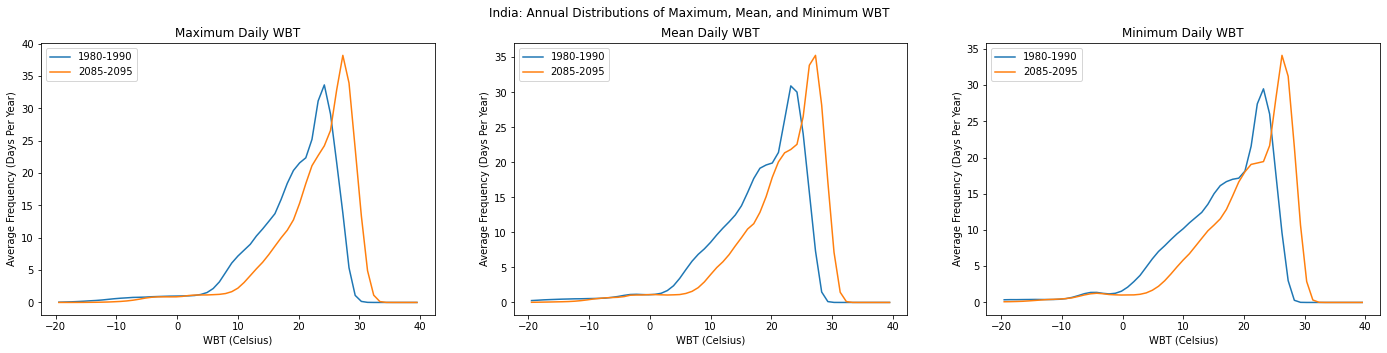

In [13]:
hist3('India')

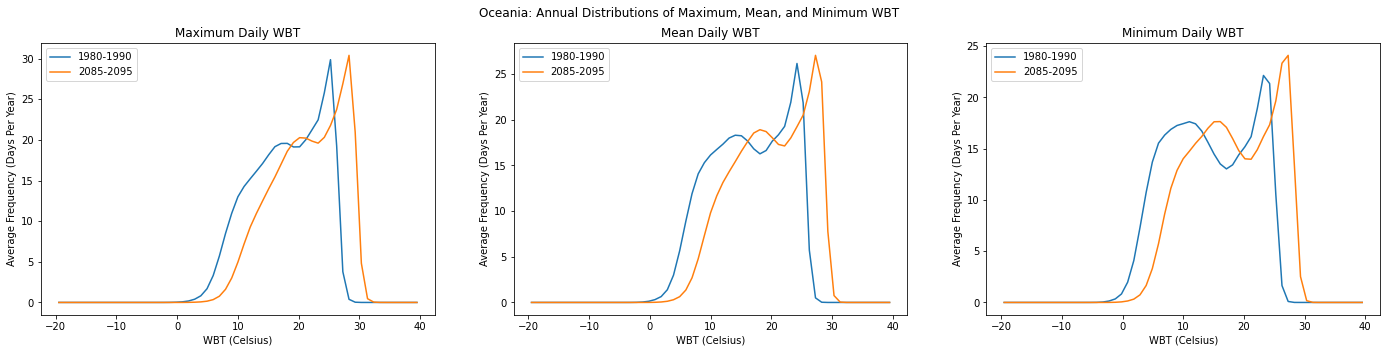

In [33]:
hist3('Oceania')

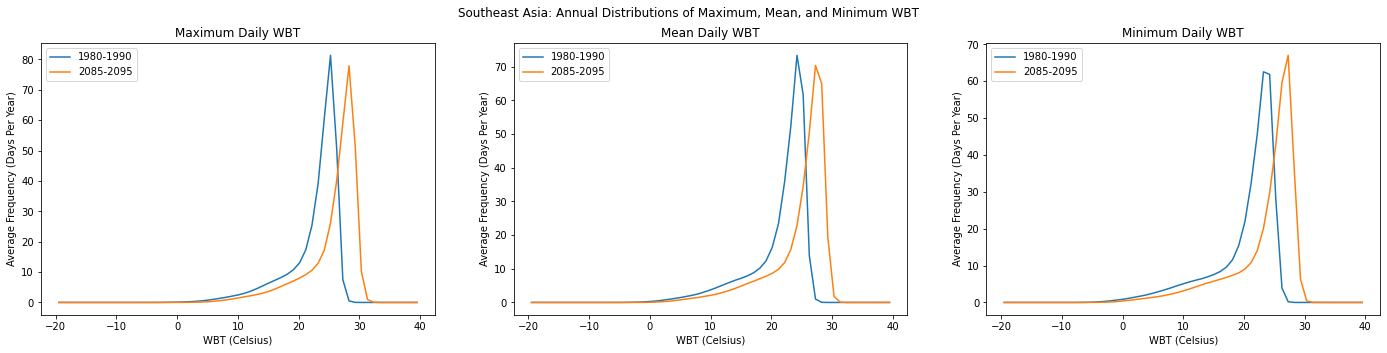

In [41]:
hist3('Southeast Asia')

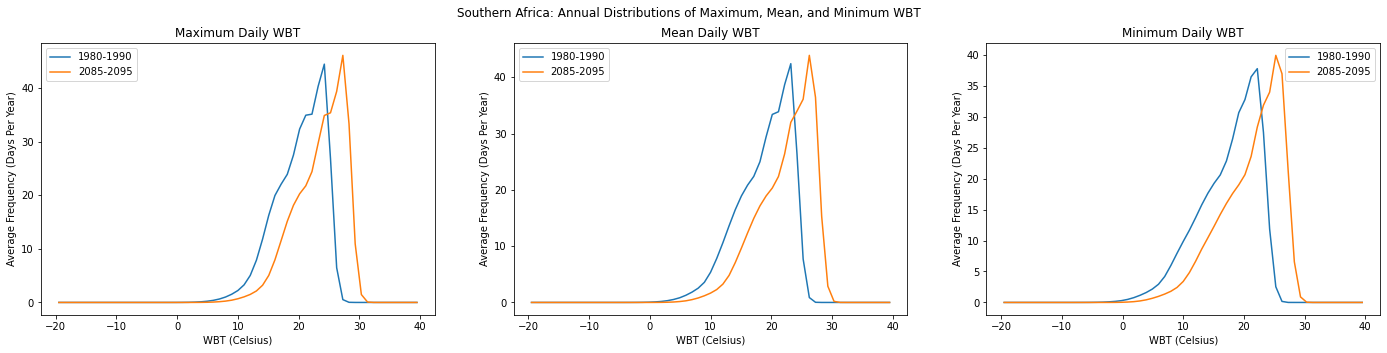

In [50]:
hist3('Southern Africa')

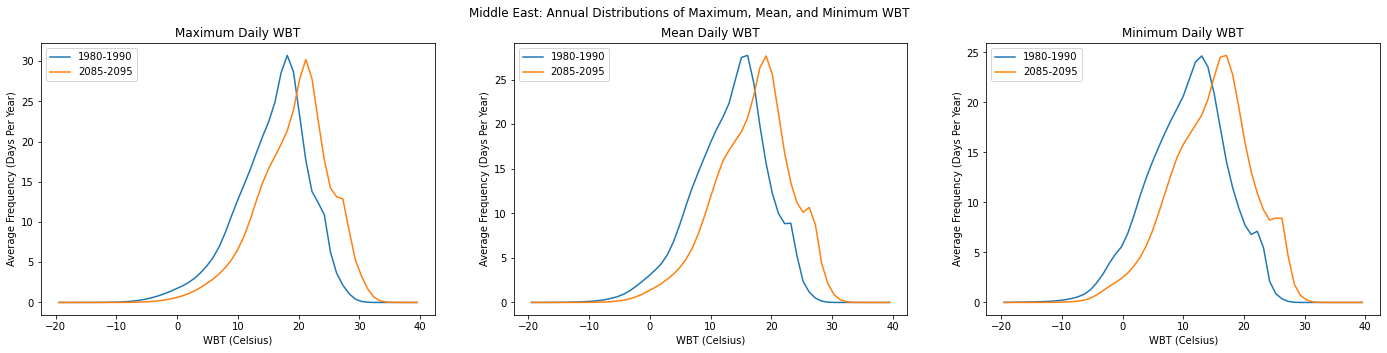

In [52]:
hist3('Middle East')

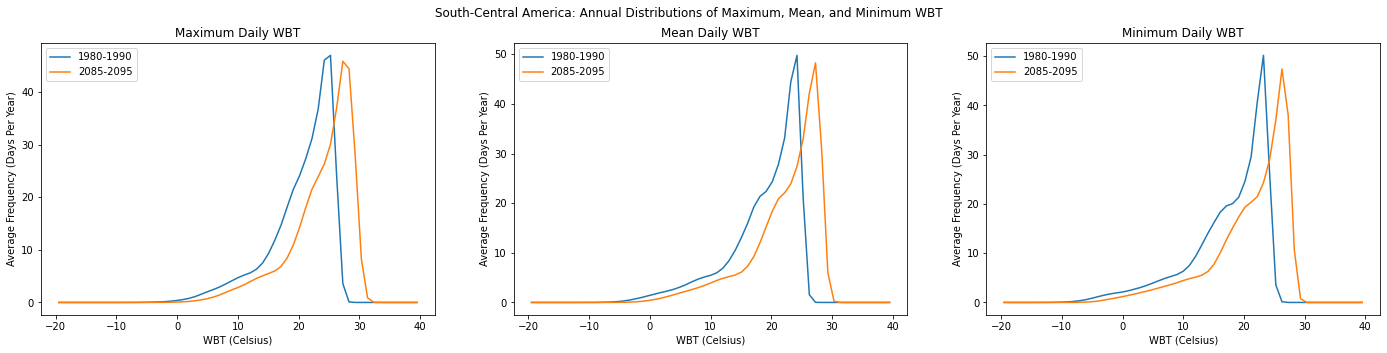

In [53]:
hist3('South-Central America')

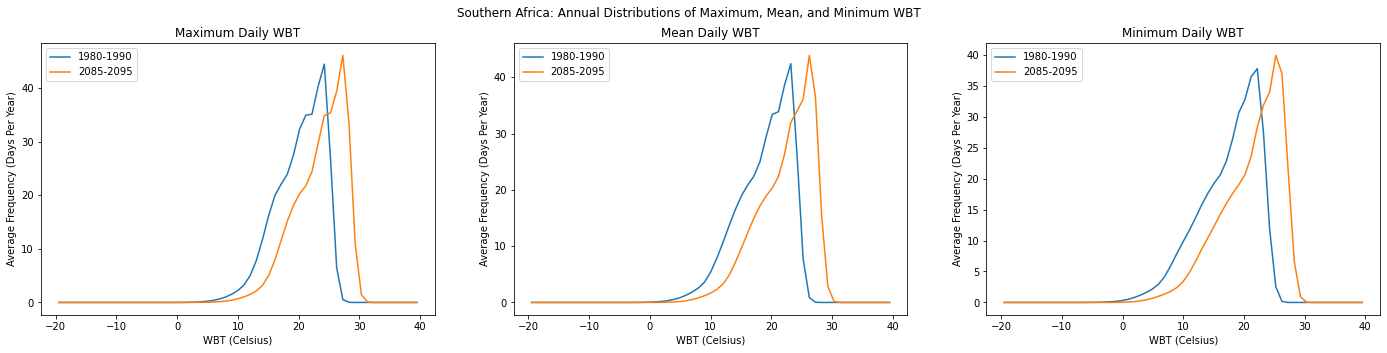

In [54]:
hist3('Southern Africa')

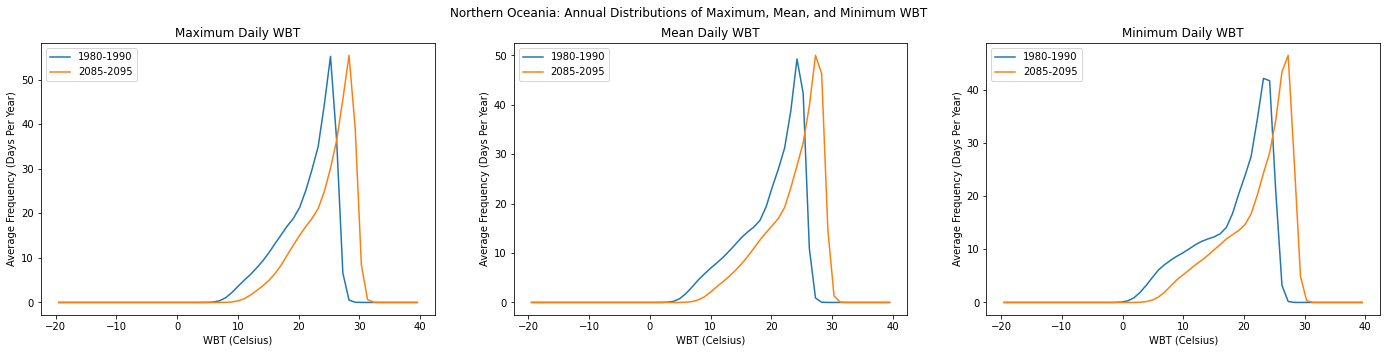

In [7]:
hist3('Northern Oceania')

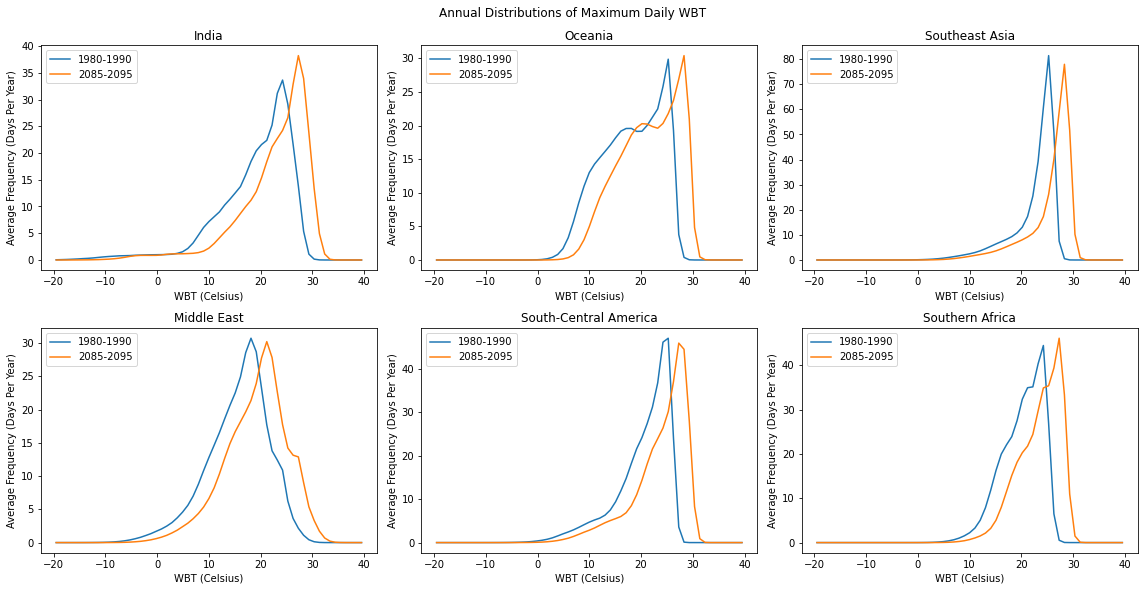

In [57]:
regions = ['India','Oceania','Southeast Asia','Middle East','South-Central America','Southern Africa']

# Create figure and axes
fig, axs = plt.subplots(figsize=(16,8),nrows=2,ncols=3)

# Running counter to determine axis
index = 0

# Loop through regions
for region in regions:
    # Get correct axis
    ax = axs[int(index/3)][index%3]
    index+=1
    
    hist(ds_1980_max,land_area_adj,region,ax)
    hist(ds_2085_max,land_area_adj,region,ax)
    ax.set_xlabel('WBT (Celsius)')
    ax.set_ylabel('Average Frequency (Days Per Year)')
    ax.set_title(region)
    ax.legend(['1980-1990','2085-2095'], loc='upper left')
    
fig.suptitle('Annual Distributions of Maximum Daily WBT',y=1.02)
plt.tight_layout()
fig.savefig('maxwbthist.png')

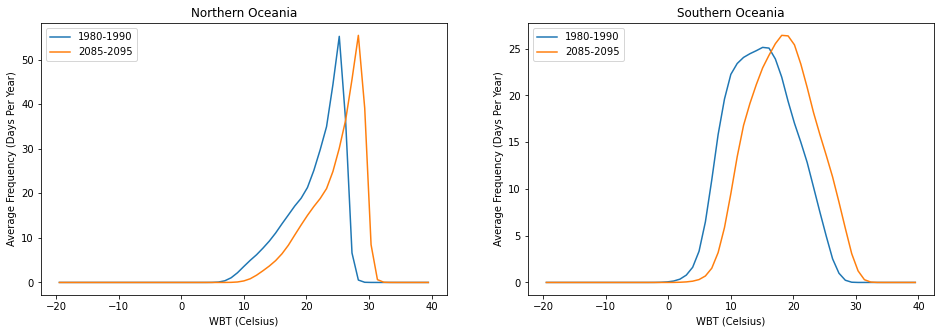

In [61]:
# Create figure and axes
fig, axs = plt.subplots(figsize=(16,5),ncols=2)

hist(ds_1980_max,land_area_adj,'Northern Oceania',axs[0])
hist(ds_2085_max,land_area_adj,'Northern Oceania',axs[0])
axs[0].set_xlabel('WBT (Celsius)')
axs[0].set_ylabel('Average Frequency (Days Per Year)')
axs[0].set_title('Northern Oceania')
axs[0].legend(['1980-1990','2085-2095'], loc='upper left')

hist(ds_1980_max,land_area_adj,'Southern Oceania',axs[1])
hist(ds_2085_max,land_area_adj,'Southern Oceania',axs[1])
axs[1].set_xlabel('WBT (Celsius)')
axs[1].set_ylabel('Average Frequency (Days Per Year)')
axs[1].set_title('Southern Oceania')
axs[1].legend(['1980-1990','2085-2095'], loc='upper left')
fig.savefig('Oceania_split_WBT.png')

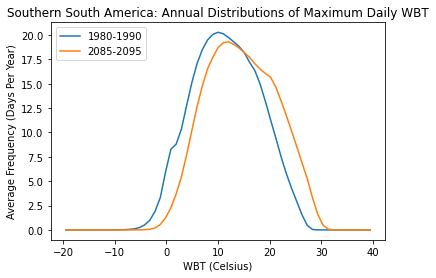

In [66]:
hist1('Southern South America')

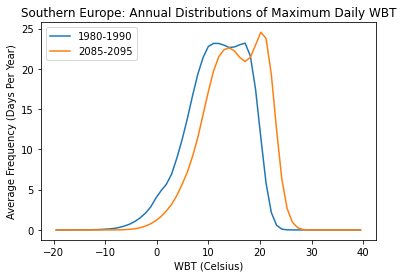

In [71]:
hist1('Southern Europe')

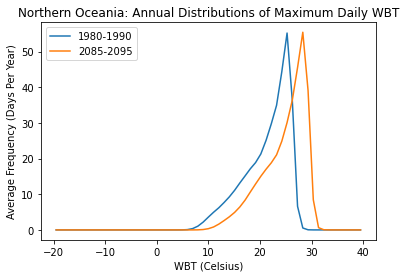

In [9]:
hist1('Northern Oceania')

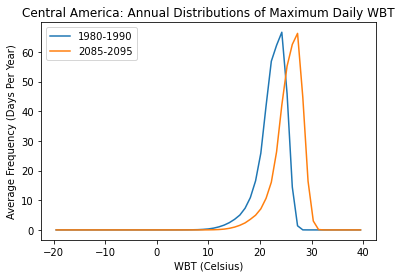

In [13]:
hist1('Central America')

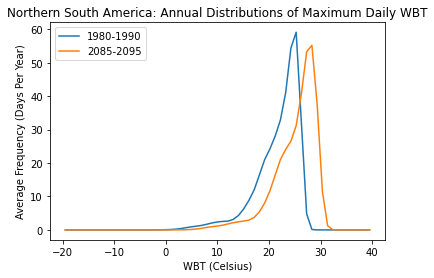

In [16]:
hist1('Northern South America')

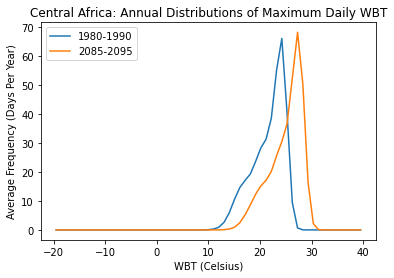

In [18]:
hist1('Central Africa')

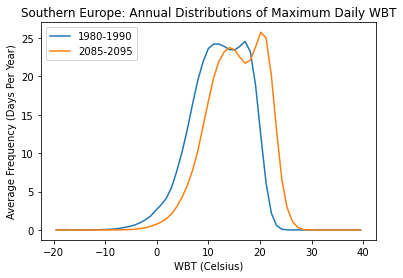

In [26]:
hist1('Southern Europe')

In [186]:
def thres_plot(region,ds,area,thres):
    # Get data for region
    ds_region = slice_region(ds,region)['WBT']
    area_region = slice_region(area,region)
    
    # Weighted area of grid cells
    area_weights = area_region/(area_region.sum(['lon','lat']))

    # Set all values above threshold to true
    ds_bool = ~np.isnan(ds_region.where(ds_region>=thres))
    
    # Sum number of values above threshold per year
    freq = (ds_bool*area_weights).sum(dim='lon').sum(dim='lat').sum(dim='ensemble').groupby('time.year').sum()
    
    # Total number of values (5 ensembles, 365 days per year)
    denom = 5*365
    
    # Frequency of occurrence as a percentage
    freq_frac = (freq/denom)*100
    
    # Plot frequency 
    fig,ax = plt.subplots()
    (freq_frac)['land_area'].plot()
    ax.set_xlabel('Year')
    ax.set_ylim(0,8)
    ax.set_ylabel('Percent of Days')
    ax.set_title('Percent of Days With Maximum WBT Above ' + str(thres) + ' Degrees Celsius: ' + region)

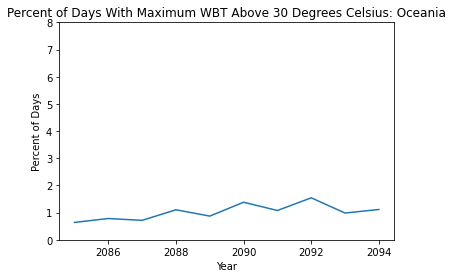

In [187]:
thres_plot('Oceania',ds_2085_max,land_area_adj,30)

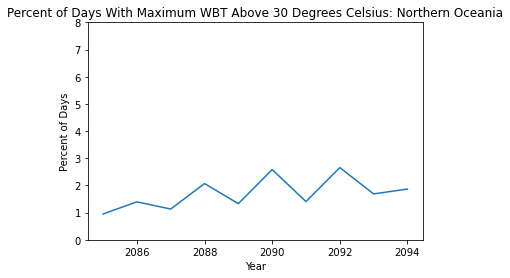

In [188]:
thres_plot('Northern Oceania',ds_2085_max,land_area_adj,30)

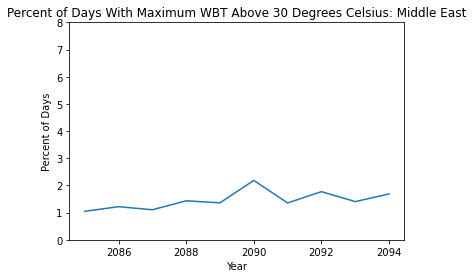

In [189]:
thres_plot('Middle East',ds_2085_max,land_area_adj,30)

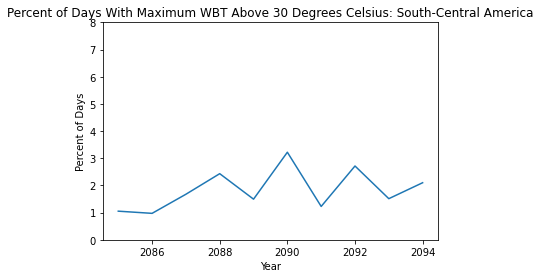

In [190]:
thres_plot('South-Central America',ds_2085_max,land_area_adj,30)

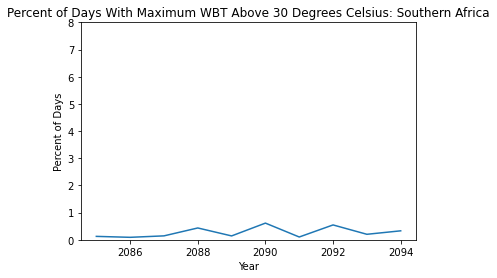

In [191]:
thres_plot('Southern Africa',ds_2085_max,land_area_adj,30)

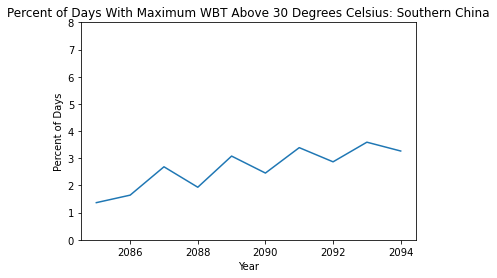

In [192]:
thres_plot('Southern China',ds_2085_max,land_area_adj,30)

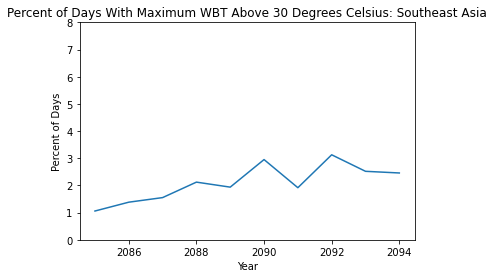

In [193]:
thres_plot('Southeast Asia',ds_2085_max,land_area_adj,30)

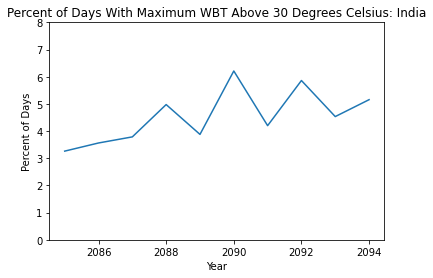

In [194]:
thres_plot('India',ds_2085_max,land_area_adj,30)

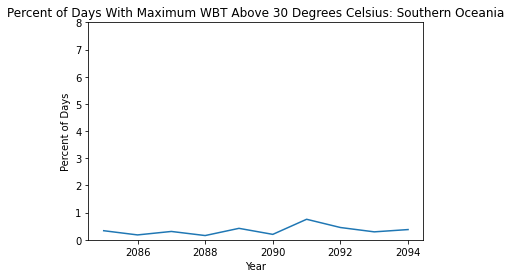

In [196]:
thres_plot('Southern Oceania',ds_2085_max,land_area_adj,30)